https://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/

In [1]:
import sys
print("Python version =", sys.version[:5])

Python version = 3.6.5


In [2]:
x = 42
print(x)

42


In [3]:
import ctypes

class IntStruct(ctypes.Structure):
    _fields_ = [("ob_refcnt", ctypes.c_long),
                ("ob_type", ctypes.c_void_p),
                ("ob_size", ctypes.c_ulong),
                ("ob_digit", ctypes.c_long)]
    
    def __repr__(self):
        return ("IntStruct(ob_digit={self.ob_digit}, "
                "refcount={self.ob_refcnt})").format(self=self)

In [4]:
num = 42
IntStruct.from_address(id(42))

IntStruct(ob_digit=0, refcount=32)

In [5]:
x = 42
y = 42
id(x) == id(y)

True

In [6]:
id(x)

1967878496

In [7]:
id(y)

1967878496

In [8]:
x = 1234
y = 1234
id(x) == id(y)

False

Text(0,0.5,'reference count')

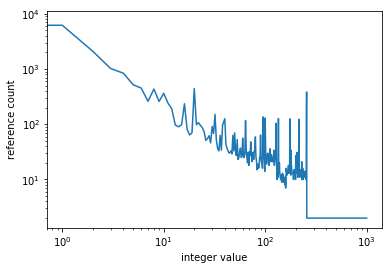

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
plt.loglog(range(1000), [sys.getrefcount(i) for i in range(1000)])
plt.xlabel('integer value')
plt.ylabel('reference count')

In [10]:
all(i == IntStruct.from_address(id(i)).ob_digit
    for i in range(256))

False

In [11]:
class ListStruct(ctypes.Structure):
    _fields_ = [("ob_refcnt", ctypes.c_long),
                ("ob_type", ctypes.c_void_p),
                ("ob_size", ctypes.c_ulong),
                ("ob_item", ctypes.c_long),  # PyObject** pointer cast to long
                ("allocated", ctypes.c_ulong)]
    
    def __repr__(self):
        return ("ListStruct(len={self.ob_size}, "
                "refcount={self.ob_refcnt})").format(self=self)

In [12]:
L = [1,2,3,4,5]
ListStruct.from_address(id(L))

ListStruct(len=5, refcount=1)

In [13]:
tup = [L, L]  # two more references to L
ListStruct.from_address(id(L))

ListStruct(len=5, refcount=3)

In [14]:
# get a raw pointer to our list
Lstruct = ListStruct.from_address(id(L))

# create a type which is an array of integer pointers the same length as L
PtrArray = Lstruct.ob_size * ctypes.POINTER(IntStruct)

# instantiate this type using the ob_item pointer
L_values = PtrArray.from_address(Lstruct.ob_item)

In [15]:
#[ptr[0] for ptr in L_values]  # ptr[0] dereferences the pointer

In [18]:
Lstruct

ListStruct(len=5, refcount=3)

In [ ]:
for each in (5*ctypes.POINTER(IntStruct)).from_address(Lstruct.ob_item):
    print(each[0])